# Telecom Customer Churn Project


### Introduction

In the telecommunications industry, customer churn is a critical metric, reflecting the sector's inherently high turnover rates. With a multitude of service providers and the ease with which customers can switch, understanding the factors that drive churn is essential for companies seeking to maintain their competitive edge. Analyzing customer churn enables telecommunications firms to identify key issues affecting customer satisfaction, optimize service offerings, and implement targeted retention strategies that foster loyalty in a highly competitive market.

In this project, we will leverage the IBM Sample Data Sets available on Kaggle to conduct a comprehensive analysis of customer churn. Our approach will include:

1. **Reading the Dataset:** Importing and preparing the data for analysis.
2. **Exploratory Data Analysis (EDA) and Data Cleaning:** Investigating the dataset to uncover patterns and ensuring data quality.
3. **Data Visualization:** Using graphical representations to enhance understanding of trends and relationships.
4. **Feature Importance:** Identifying which factors most significantly influence customer churn.
5. **Feature Engineering:** Creating new variables to improve model performance.
6. **Training and Testing Set:** Splitting the data for effective model evaluation.
7. **Assessing Multiple Algorithms:** Comparing the performance of various machine learning algorithms.
8. **Performance of the Model:** Evaluating the effectiveness of the chosen model in predicting churn.

### Objective
The primary objective of this project is to understand the factors contributing to customer churn and to predict churn using data analysis and machine learning techniques. By gaining insights into customer behavior, we aim to provide actionable recommendations for reducing churn and enhancing customer retention strategies.

## 1. Reading Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
sns.set_style('whitegrid')
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('/Users/apple/myprojects/Telco-Customer-Churn.csv')

In [3]:
for column in df.columns:
    print(f"Column: {column} - Unique Values: {df[column].unique()}")

Column: customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No phone service' 'No' 'Yes']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSuppor

The dataset contains 7043 rows and 21 columns, with each row representing a customer and each column detailing specific customer attributes.

This data set contains the following features:

**Identifier**  
```customerID:``` Each row represents a customer  

**Taget Variable:**   
```Churn:```Whether the customer churned or not (`Yes` or `No`) 

**Independent Variables:**

**Demographic Feature**  
```gender:``` `Female`, `Male`  
```SeniorCitizen:``` Whether the customer is a senior citizen or not (`1`, `0`)  
```Partner:``` Whether the customer has a partner or not (`Yes`, `No`)  
```Dependents:``` Whether the customer has dependents or not (`Yes`, `No`)  

**Customer Account Information**  
```tenure:``` Number of months the customer has stayed with the company  
```Contract:``` The contract term of the customer (`Month-to-month`, `One year`, `Two year`)  
```PaperlessBilling:``` Whether the customer has paperless billing or not (`Yes`, `No`)  
```PaymentMethod:``` The customer’s payment method (`Electronic check`, `Mailed check`, `Bank transfer (automatic)`, `Credit card((automatic))`  
```MonthlyCharges:``` The amount charged to the customer monthly  
```TotalCharges:``` The total amount charged to the customer  
 
**Service Information**  
```PhoneService:``` Whether the customer has a phone service or not (`Yes`, `No`)  
```MultipleLines:``` Whether the customer has multiple lines or not (`Yes`, `No`, `No phone service`)  
```InternetService:``` Customer’s internet service provider (`DSL`, `Fiber optic`, `No`)  
```OnlineSecurity:``` Whether the customer has online security or not (`Yes`, `No`, `No internet service`)   
```OnlineBackup:``` Whether the customer has online backup or not (`Yes`, `No`, `No internet service`)  
```DeviceProtection:``` Whether the customer has device protection or not (`Yes`, `No`, `No internet service`)  
```TechSupport:``` Whether the customer has tech support or not (`Yes`, `No`, `No internet service`)  
```StreamingTV:``` Whether the customer has streaming TV or not (`Yes`, `No`, `No internet service`)  
```StreamingMovies:``` Whether the customer has streaming movies or not (`Yes`, `No`, `No internet service`)  


## 2. Exploratory Data Analysis and Data Cleaning

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We observed that the 'TotalCharges' column has been incorrectly detected as an object data type. This column represents the total amount of money charged to the customer and should be formatted as a numeric type

In [6]:
# transform the column TotalCharges into a numeric data type
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

In [7]:
#Duplicate Value
unique_customers = df['customerID'].nunique()
print(f'The number of unique customer IDs is: {unique_customers}')

The number of unique customer IDs is: 7043


In [8]:
df.duplicated().sum()

0

<Axes: >

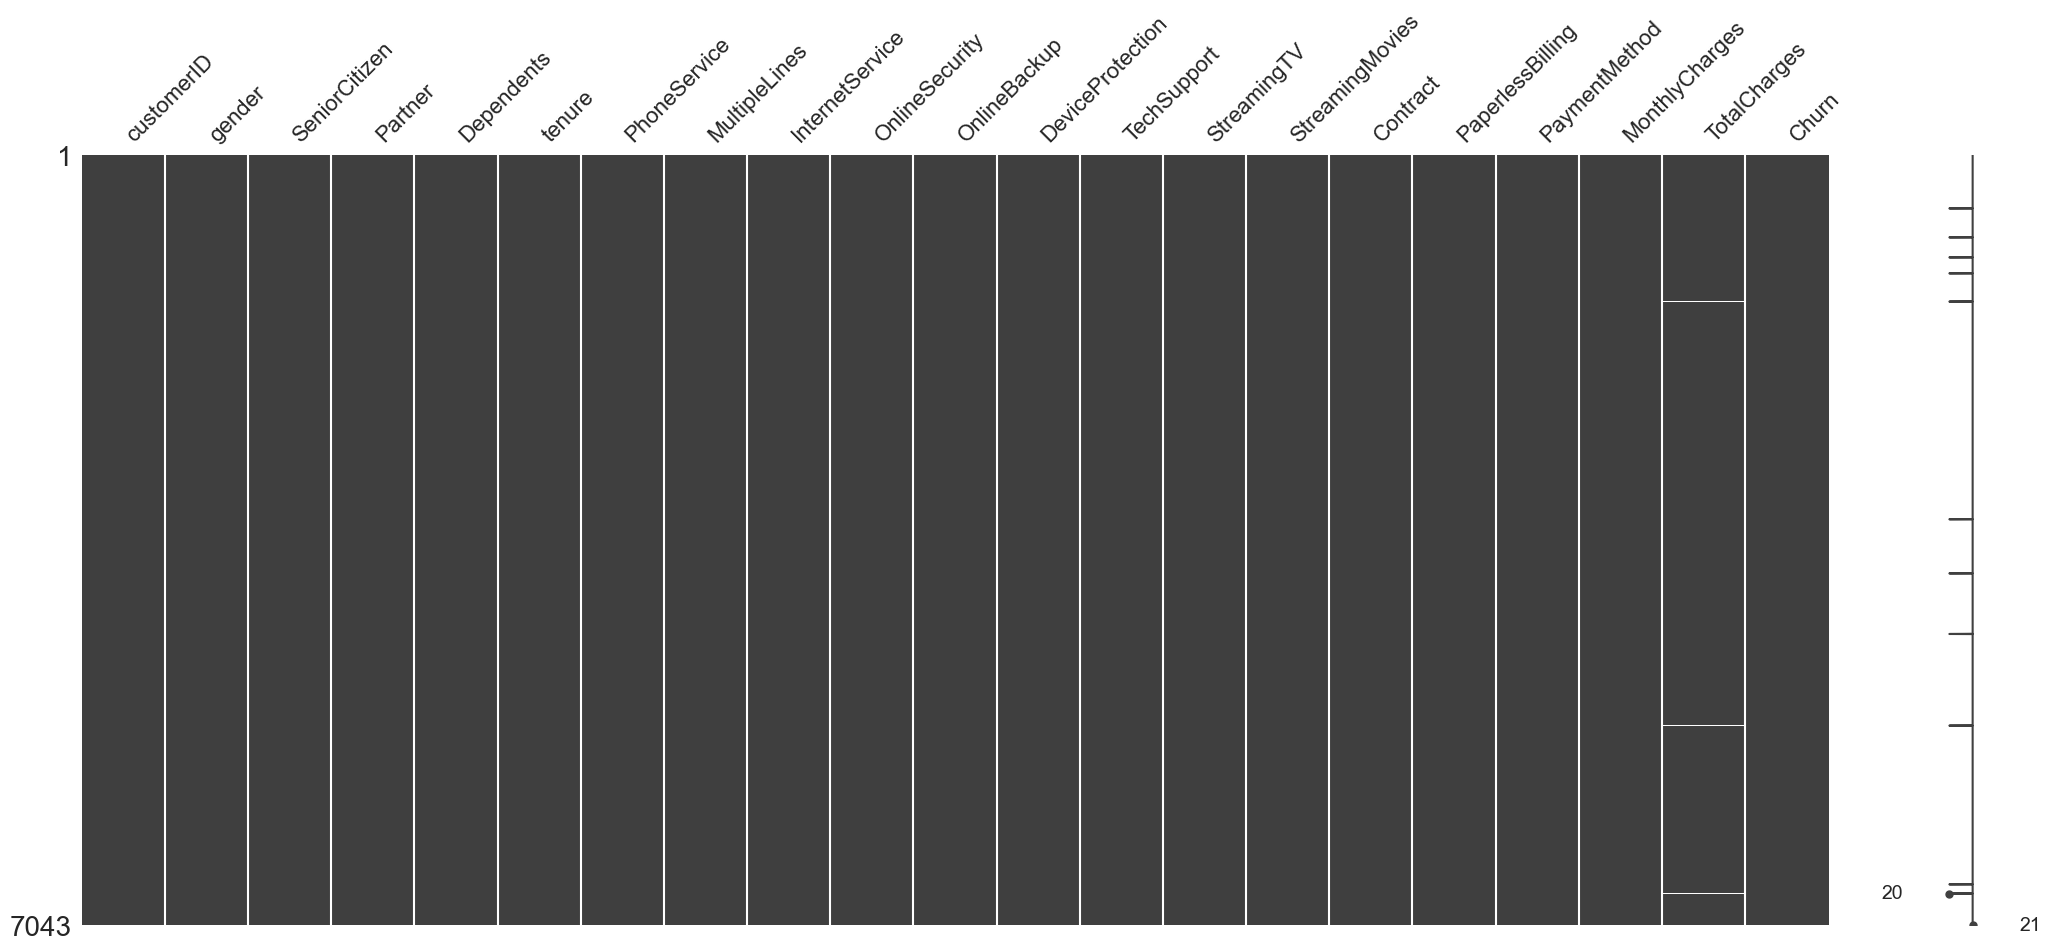

In [9]:
#Missing Value
msno.matrix(df)

In [10]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [11]:
zero_tenure_count = (df['tenure'] == 0).sum()
print(zero_tenure_count)

11


We have identified 11 rows where the `TotalCharges` column contains NaN values, while the `tenure` column shows 0, despite the presence of values in the MonthlyCharges column. This might be because these customers have just opened their accounts. You can either replace the null values with 0 or delete the rows. In this version, I will remove the rows with missing values.

In [12]:
df.dropna(inplace=True)
df.shape[0]


7032

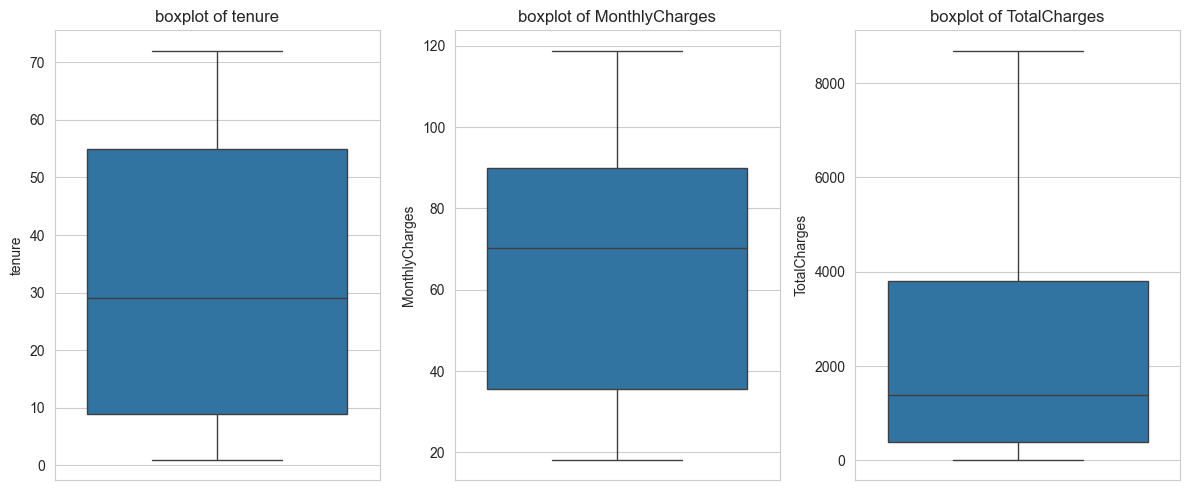

In [13]:
#Checking outliers
plt.figure(figsize = (12,5))
for i, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges'],1):
    plt.subplot(1,3,i)
    sns.boxplot(y=df[col])
    plt.title(f'boxplot of {col}')
plt.tight_layout()
plt.show()
    

From above boxplot, There is no outliers in tenure, MonthlyCharges and TotalCharges

In [14]:
# Removing CustomerID column
df.drop(columns=['customerID'],inplace=True)

In [15]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [16]:
#Remove(automatic) to improve readability
df['PaymentMethod'] = df['PaymentMethod'].str.replace(r'\s*\(automatic\)', '',regex=True)
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

## 3. Data Visualization

In [17]:
df['Churn'].value_counts

<bound method IndexOpsMixin.value_counts of 0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object>

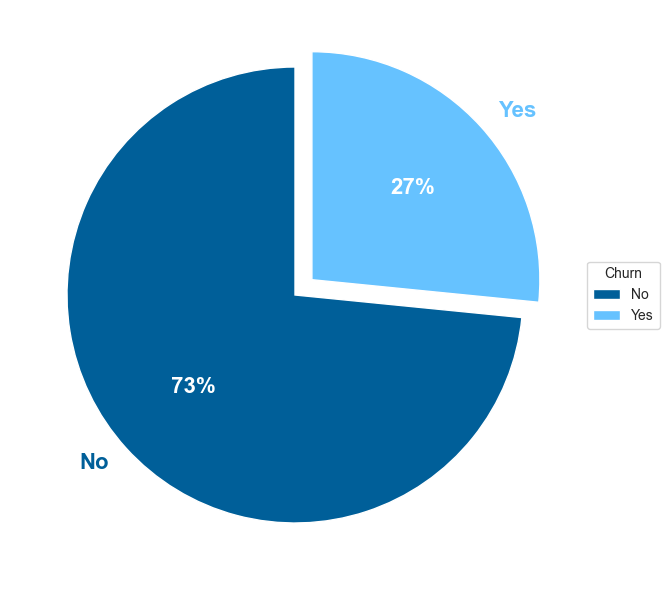

In [18]:
#Churn Distribution 

# Calculate the data for the pie chart
pie_data = df['Churn'].value_counts(normalize=True) * 100
pie_labels = pie_data.index.to_list()

colors = ['#005f99', '#66c2ff'] 
# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(pie_data, labels=pie_data.index, colors = colors,
                                   startangle=90, explode=[0, 0.1],
                                   autopct='%.0f%%',
                                   textprops={'color': 'w', 'fontsize': 16, 'weight': 'bold'})

for text, wedge in zip(texts,wedges):
    text.set_color(wedge.get_facecolor())

ax.legend(wedges, pie_data.index, title="Churn", loc="center left", bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

As noted above, the majority class, "Not Churned," constitutes approximately 73% of the dataset, indicating an **imbalance**. In binary classification scenarios, such imbalances can cause the majority class to dominate the model's learning process, often resulting in a significant number of false negatives.

***The stacked bar charts below is categorized by Demographic Information, Customer Account Information, and Service Information,illustrating the churn counts for each attribute.***

### Demographic Information

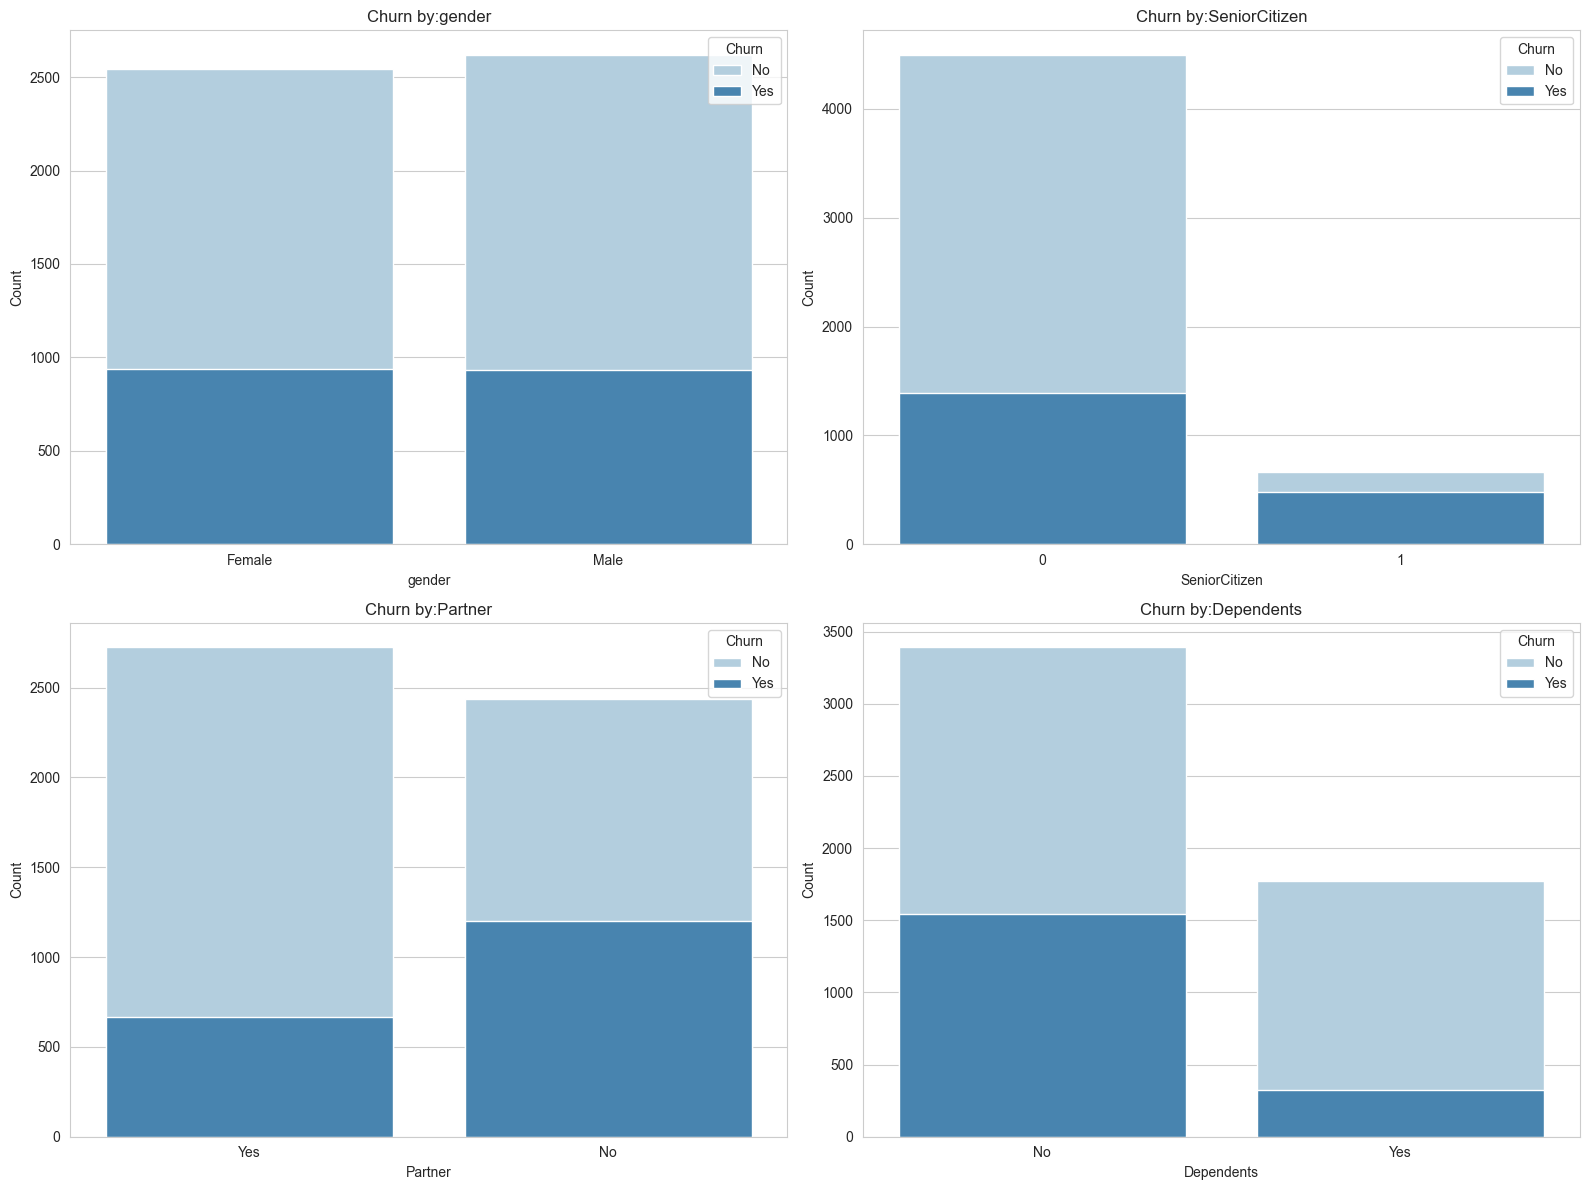

In [19]:
Demogr = ["gender", "SeniorCitizen", "Partner", "Dependents"]
fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16,12))

# Flatten the axes array for easier iteration
axes = axes.flatten()
# Loop through each column and create a count plot
for index, column in enumerate(Demogr):
    ax=sns.countplot(x=column, hue="Churn", data=df, palette="Blues", dodge=False, ax=axes[index])
    ax.set_xlabel(column)
    ax.set_title('Churn by:' + column)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


- Gender has no significant predictive power regarding churn, as similar percentage of churn are observed for both male and female customers
- Senior citizens exhibit a higher churn rate compared to younger customers
- Customers without partners have a higher churn rate than those with partners.
- Customers without dependents have a higher churn rate than those with dependents.

### Customer Account Information 

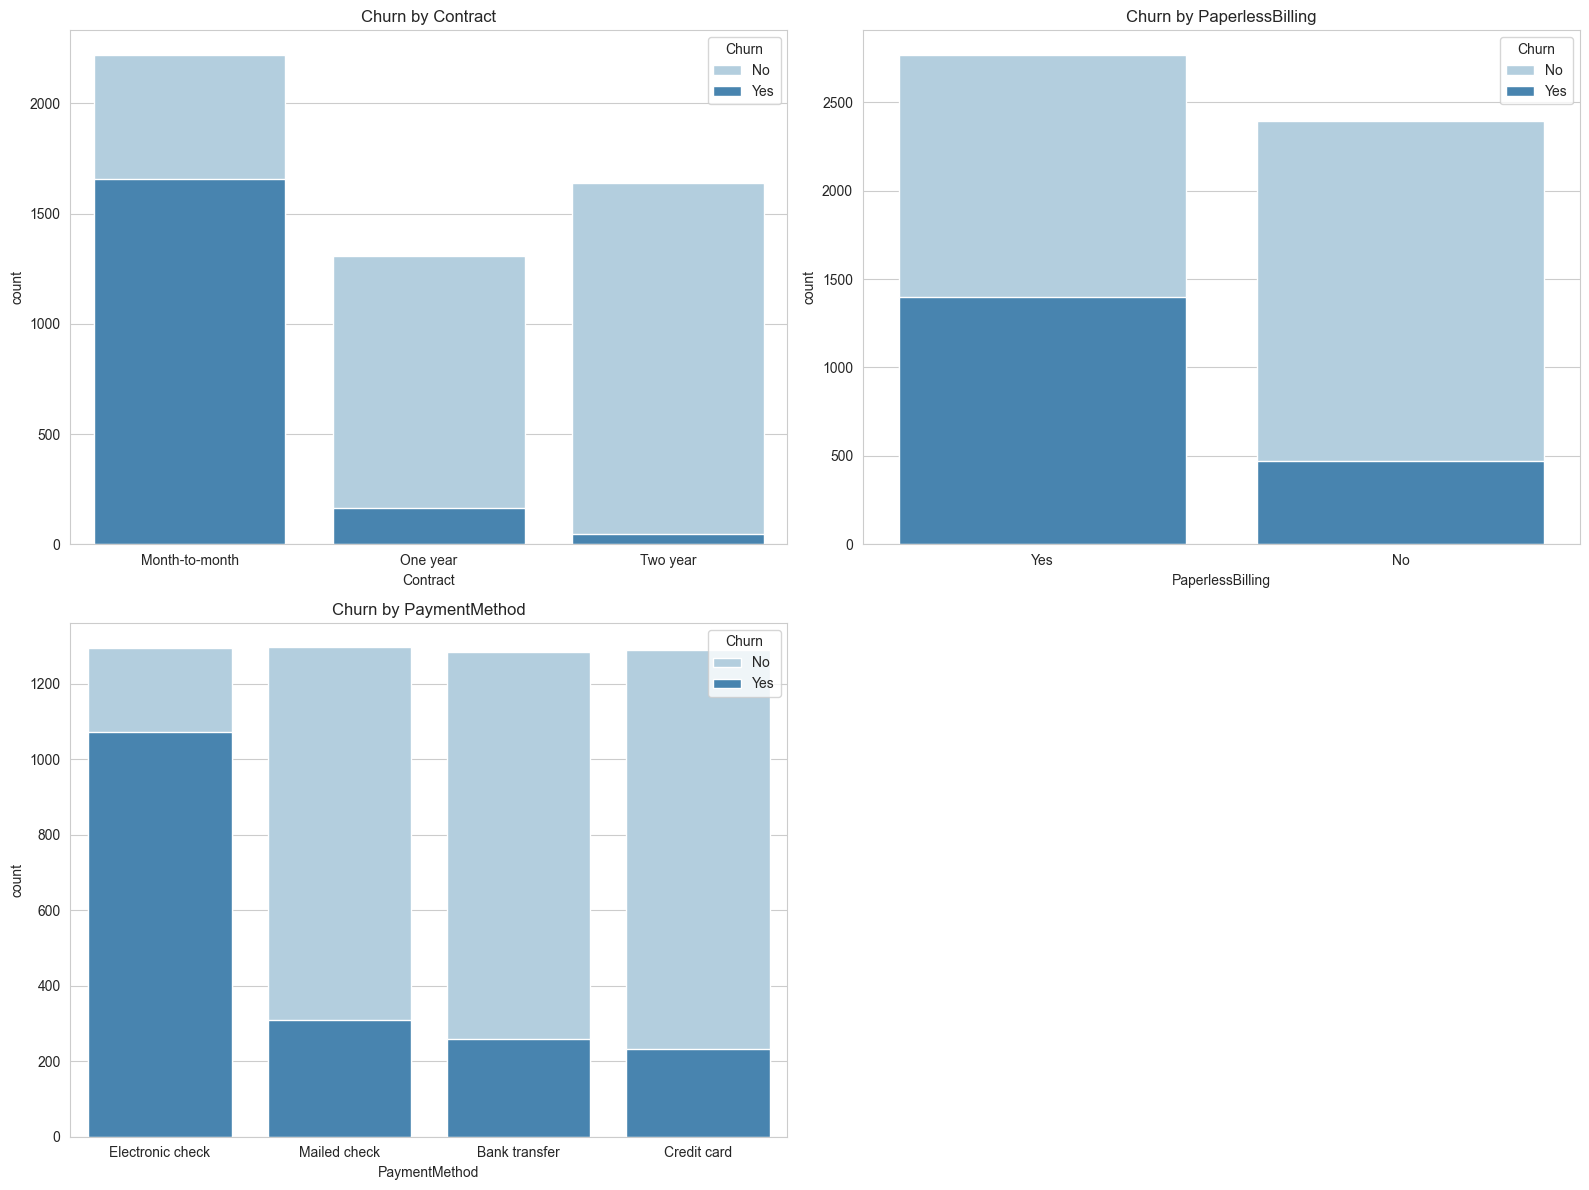

In [20]:
account_columns = ['Contract', 'PaperlessBilling', 'PaymentMethod']

fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16,12), )

axes = axes.flatten()

for index, column in enumerate(account_columns):
    ax = sns.countplot(x=column, hue="Churn", data=df, palette="Blues", dodge=False,ax=axes[index])
    ax.set_xlabel(column)
    ax.set_title('Churn by ' + column)

if len(account_columns) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

As shown above, we can draw the following conclusions:
- Customers with **month-to month contracts** exhibit a higher churn rate compared to those with yearly contracts.
- Customers who opted for **paperless billing** have a higher churn rate than those who did not.
- Customers using **electronic payment methods** show a significantly higher churn rate 

### Customer Account Information — Numerical feature

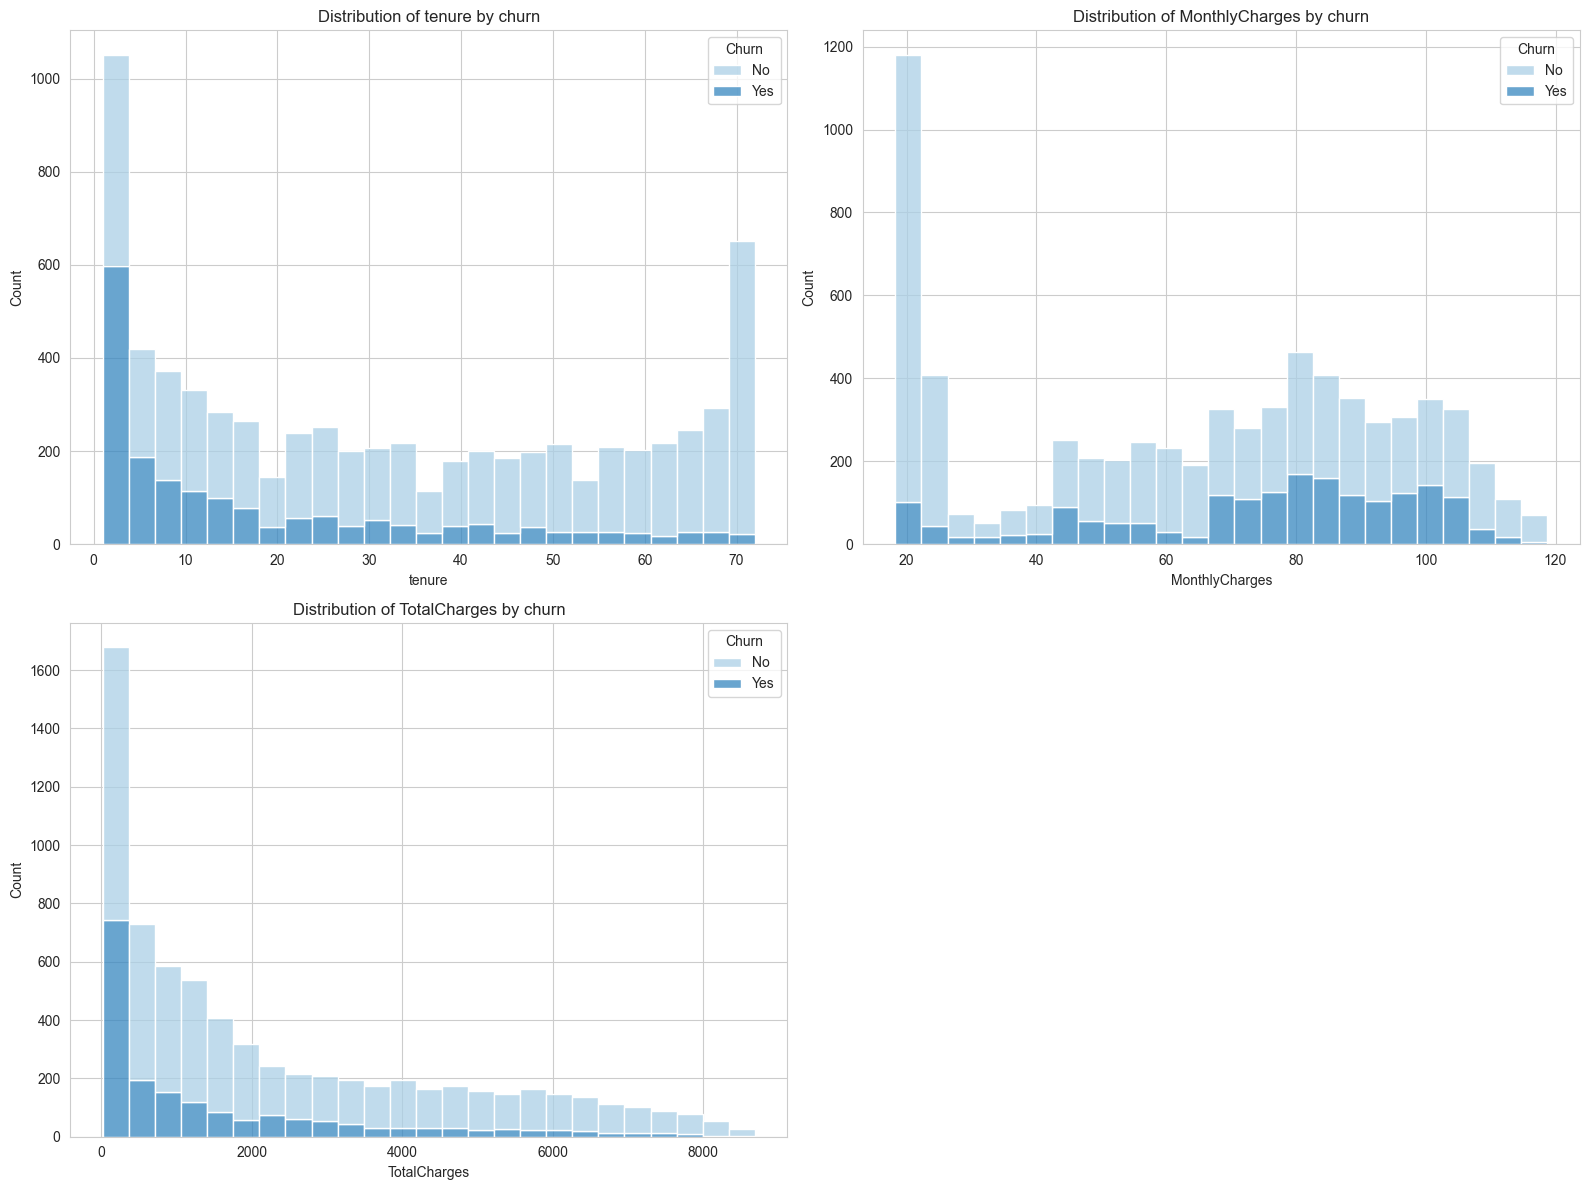

In [21]:
account_columns_numeric = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16,12))

axes = axes.flatten()

for index, column in enumerate(account_columns_numeric):
    sns.histplot(data=df,x=column, hue="Churn", multiple="stack",  palette="Blues", ax=axes[index],bins=25)
    axes[index].set_xlabel(column)
    axes[index].set_title('Distribution of ' + column + ' by churn')

if len(account_columns_numeric) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

- Analysis shows that new customers(shorter tenures) are more likely to churn.
- The churn rate tends to be higher when **monthly charges** are elevated
- Conversely,the churn rate decreases as **total charges** increase

### Service Information

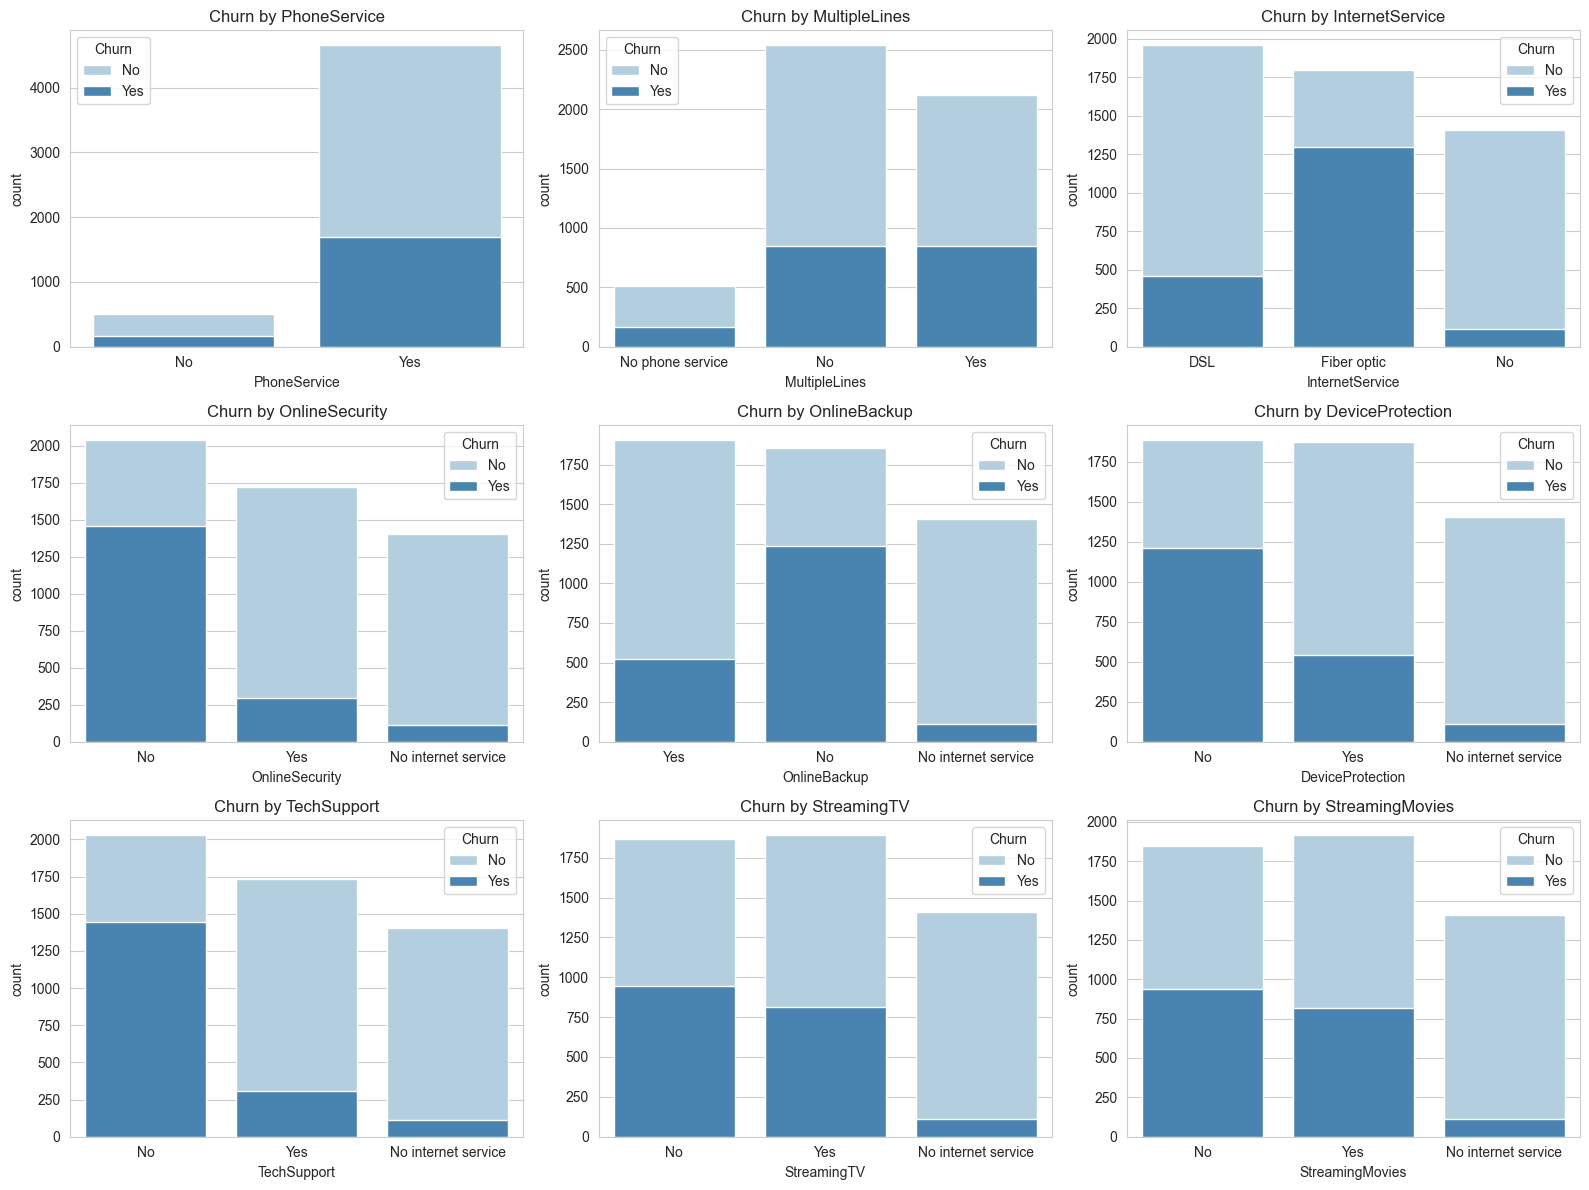

In [22]:
services_columns = ['PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity',
                    'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig,axes = plt.subplots(nrows = 3, ncols = 3, figsize = (16,12))

axes = axes.flatten()

for index, column in enumerate(services_columns):
    ax = sns.countplot(x=column, hue="Churn", data=df, palette="Blues", dodge=False, ax=axes[index])
    ax.set_xlabel(column)
    ax.set_title('Churn by ' + column)


if len(services_columns) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

- The risk of losing users who have not activated services (online security services, online backup services, device protection, tech support) is relatively high
- Subscribing to online TV and movies has minimal effect on user churn; however, clients who haven't accessed these services exhibit a slightly higher risk of churning

By visualizing churn counts across various attributes, we can pinpont the features that most significantly impact on churn. We expect these attributes to be crucial in our future models.

## 4. Mutual Information - Feature importance

In the next step, we will utilize mutual information to identify potential predictors of churn. in machine learning, this method assesses the relevance of features in relation to the target variable, allowing us to pinpoint the most informative variables for predictive modeling. Mutual information effectively captures both linear and non-linear relationships and is applicable to both categorical and continuous variables

In [23]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
from sklearn.metrics import mutual_info_score

In [25]:
def calculate_mutual_info(categorical_variable):
    return mutual_info_score(categorical_variable, df['Churn'])

# Select categorical variables, excluding the target variable
cat_variables = df.select_dtypes(include='object').drop(columns='Churn',axis=1)

# Compute mutual information scores for each categorical variable
mutual_info_scores = cat_variables.apply(calculate_mutual_info).sort_values(ascending=False)
print(mutual_info_scores)


Contract            0.098182
OnlineSecurity      0.064528
TechSupport         0.062873
InternetService     0.055394
OnlineBackup        0.046659
PaymentMethod       0.044423
DeviceProtection    0.043784
StreamingMovies     0.031918
StreamingTV         0.031803
PaperlessBilling    0.019119
Dependents          0.014270
Partner             0.011383
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64


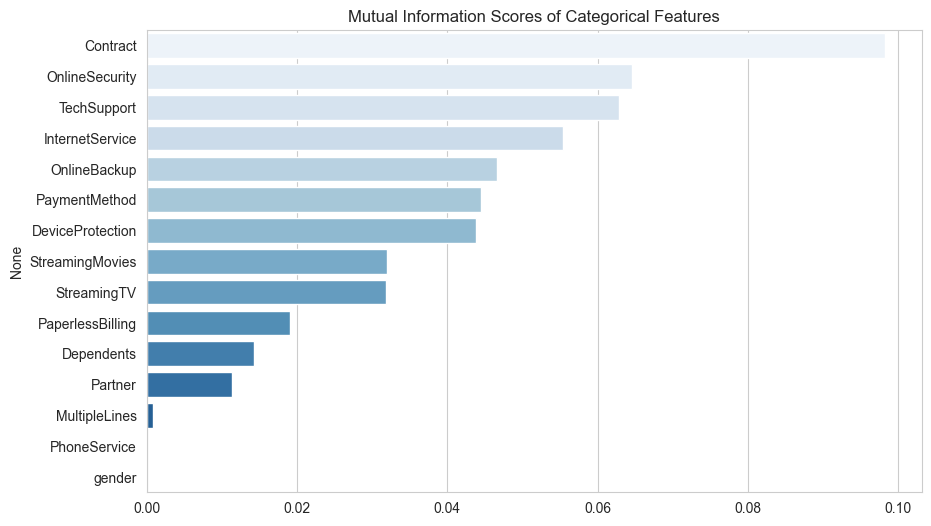

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x=mutual_info_scores.values, y = mutual_info_scores.index, palette='Blues',hue=mutual_info_scores.index)
plt.title('Mutual Information Scores of Categorical Features')
plt.show()


In [27]:
from sklearn.feature_selection import mutual_info_classif
# Select only numerical columns
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Compute mutual information for numerical features
mi_scores_numerical = mutual_info_classif(df[numerical_features], df['Churn'], discrete_features=False, random_state=42)

# Create a DataFrame
mi_numerical_df = pd.DataFrame({"Feature": numerical_features, "Mutual Information": mi_scores_numerical})
mi_numerical_df = mi_numerical_df.sort_values(by="Mutual Information", ascending=False)

print(mi_numerical_df)

          Feature  Mutual Information
0          tenure            0.085737
1  MonthlyCharges            0.047242
2    TotalCharges            0.042697


From the analysis above, we observed that the scores of `MultipleLines`, `PhoneService`, and `Gender` features are close to zero, indicating that they have little or even zero predictive power for the churn variable. Therefore, we can consider removing these features from the model.

In [28]:
df = df.drop(columns = ['MultipleLines', 'PhoneService', 'gender'])

## 5. Feature Engineering

In the next step, we will convert categorical variables into numerical formats. Machine learning algorithms generally require numerical data, as they are primarily designed to work with it. Additionally, we will standardize numerical variables to ensure that larger values do not dominate the analysis.  


### Label Encoding for binary variable

In [29]:
df_transformed = df.copy()
label_encoding_columns = ['Partner', 'Dependents', 'PaperlessBilling','Churn']
for column in label_encoding_columns:
    df_transformed[column] = df_transformed[column].map({'Yes':1, 'No':0})

df_transformed.head() 

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,34,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,45,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer,42.30,1840.75,0
4,0,0,0,2,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


### One Hot Encoding

In [30]:
# encode categorical variables with more than two levels using one-hot encoding
one_hot_encoding_columns = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                            'TechSupport', 'StreamingTV',  'StreamingMovies', 'Contract', 'PaymentMethod']
df_transformed = pd.get_dummies(df_transformed, columns = one_hot_encoding_columns)
df_transformed = df_transformed.astype(int)

One-hot encoding is a technique for converting categorical variables into a numerical format. However, when applied to categorical variables with many unique values, it can generate a large number of new columns. This increase in dimensionality can lead to higher computational costs and may result in overfitting in machine learning models.

### Normalization 

We will use the Min-Max scaling method to rescale the numeric columns to a common scale. Min-Max scaling transforms the features to a fixed range, typically [0, 1]. This ensures that all features contribute equally to distance calculations in many algorithms, preventing any single feature from dominating due to differences in scale.

In [31]:
min_max_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

for column in min_max_columns: 
    min_column = df_transformed[column].min()
    max_column = df_transformed[column].max()

    #Avoid division by zero if all values are the same
    if max_column != min_column:
        df_transformed[column] = (df_transformed[column] - min_column)/(max_column - min_column)
    else:
        df_transformed[column] = 0 # Or set to a constant value
        
        

## 6. Training and test data split

In [32]:
from sklearn.model_selection import train_test_split
X = df_transformed.drop(columns = 'Churn')
y = df_transformed.loc[:, 'Churn']

print(X.columns)
print(y.name)


Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer',
       'PaymentMethod_Credit card', 'PaymentMethod_Electronic check',
       'PaymentMethod_Mailed check'],
      dtype='object')
Churn


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
print(y_train.value_counts())

Churn
0    4130
1    1495
Name: count, dtype: int64


**SMOTE(Synthetic Minority Over-sampling Technique)**

In [35]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train,y_train)

print("After SMOTE Oversampling:")
print(Counter(y_train_resampled))


After SMOTE Oversampling:
Counter({1: 4130, 0: 4130})


## 7. Model Training

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "xgboost": XGBClassifier()
}


results = {name: cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring="accuracy").mean() 
           for name, model in models.items()}

print(pd.DataFrame(results.items(), columns=["Model", "Mean Accuracy"]).sort_values("Mean Accuracy", ascending=False))
    

                    Model  Mean Accuracy
1           Random Forest       0.841889
5                 xgboost       0.831719
4     K-Nearest Neighbors       0.812954
3  Support Vector Machine       0.811138
0     Logistic Regression       0.809322
2       Gradient Boosting       0.805085


Random Forest gives the highest accuracy compared to other models with default parameters.

In [37]:
rfc = RandomForestClassifier(random_state = 42)

In [38]:
rfc.fit(X_train_resampled,y_train_resampled)

RandomForestClassifier(random_state=42)

## Model Evaluation

In [39]:
print(y_test.value_counts())

Churn
0    1033
1     374
Name: count, dtype: int64


In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
#evaluate on test data
y_test_pred = rfc.predict(X_test)

print("Accuracy Score:\n", accuracy_score(y_test,y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_test_pred))
print("Classification Report:\n", classification_report(y_test,y_test_pred))

Accuracy Score:
 0.7626154939587776
Confusion Matrix:
 [[835 198]
 [136 238]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83      1033
           1       0.55      0.64      0.59       374

    accuracy                           0.76      1407
   macro avg       0.70      0.72      0.71      1407
weighted avg       0.78      0.76      0.77      1407



In [41]:
# Save model
import pickle
model_data = {"model":rfc, "features_names": X.columns.tolist()}

with open("customer_churn_model.pkl", "wb") as file:
    pickle.dump(model_data, file)
